In [1]:
# Initial set-up

from problema_backtracking import problema


# Importing libraries
import numpy as np
from matplotlib import pyplot as plt
from utils.utils import time_algorithm
import seaborn as sns
import scipy as sp
import time

# Setting up the style of the plots
sns.set_theme()

In [10]:
# Exectute the algorithm with random arrays and measure the time it takes to run
def get_random_array(size):
    from random import randint
    row_demand = []
    col_demand = []
    ships = []

    n = size
    m = size

    for _ in range(size):
        row_demand.append(randint(0, size - 1))
        col_demand.append(randint(0, size - 1))
        
    b = int(size/3) if int(size/3) > 0 else 1
    for _ in range(b):
        ships.append(4)

    board = [[0] * m for _ in range(n)]
    mejor_solucion = [board, float("inf")]
    barcos = [(i + 1, length) for i, length in enumerate(ships)]

    return board, barcos, row_demand, col_demand, mejor_solucion

sizes = [x for x in range(5, 31)]
runs_per_size = 10
results = {}
        
for size in sizes:
    times_per_size = []
    for _ in range(runs_per_size):
        board, barcos, row_demand, col_demand, mejor_solucion = get_random_array(size)
        init_time = time.time()
        problema(
            board,
            barcos,
            row_demand,
            col_demand,
            mejor_solucion,
        )
        end_time = time.time()

        time_for_run = end_time - init_time
        times_per_size.append(time_for_run)

    average_time = np.mean(times_per_size)
    results[size] = average_time

    print("For size", size, "average time is", average_time)

x = sizes

For size 5 average time is 3.702640533447266e-05
For size 6 average time is 0.00018129348754882812
For size 7 average time is 0.0004417657852172852
For size 8 average time is 0.0007897138595581055
For size 9 average time is 0.001531982421875
For size 10 average time is 0.0020659923553466796
For size 11 average time is 0.002468395233154297
For size 12 average time is 0.004522848129272461
For size 13 average time is 0.005936336517333984
For size 14 average time is 0.008161377906799317
For size 15 average time is 0.014849138259887696
For size 16 average time is 0.020261549949645997
For size 17 average time is 0.024398660659790038
For size 18 average time is 0.03653552532196045
For size 19 average time is 0.04200243949890137
For size 20 average time is 0.0518913745880127
For size 21 average time is 0.06997816562652588
For size 22 average time is 0.08476338386535645
For size 23 average time is 0.10209128856658936
For size 24 average time is 0.14043023586273193
For size 25 average time is 0.

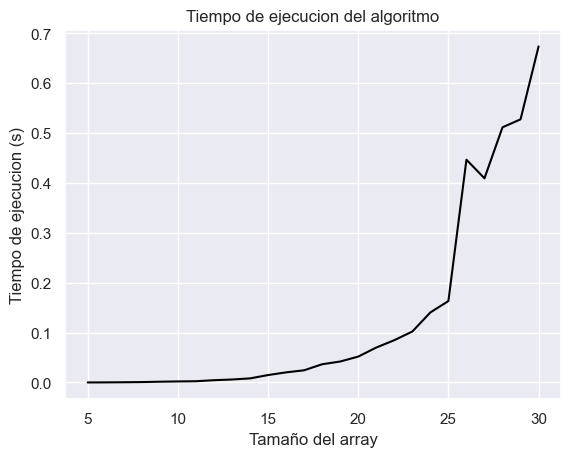

In [11]:
# Plot the results of the executions
fig, ax = plt.subplots()
ax.plot(x, [results[n] for n in x], label="Medicion", color="black")
ax.set_title("Tiempo de ejecucion del algoritmo")
ax.set_xlabel("Tamaño del array")
ax.set_ylabel("Tiempo de ejecucion (s)")
plt.show()

In [12]:
# Aproximate the function with a lineal, n log(n) and n^2 functions

# Define the functions
f_lineal = lambda x, c1, c2: c1 * x + c2
f_nlogn = lambda x, c1, c2: c1 * x * np.log(x) + c2
f_n2 = lambda x, c1, c2: c1 * x**2 + c2

# Fit the functions
c_lineal, _ = sp.optimize.curve_fit(f_lineal, x, [results[n] for n in x])
c_nlogn, _ = sp.optimize.curve_fit(f_nlogn, x, [results[n] for n in x])
c_n2, _ = sp.optimize.curve_fit(f_n2, x, [results[n] for n in x])

# Print the results
print(f"c_1 lineal: {c_lineal[0]}, c_2 lineal: {c_lineal[1]}")
print(f"c_1 n log(n): {c_nlogn[0]}, c_2 n log(n): {c_nlogn[1]}")
print(f"c_1 n^2: {c_n2[0]}, c_2 n^2: {c_n2[1]}")

c_1 lineal: 0.02109949947208889, c_2 lineal: -0.24058592727311634
c_1 n log(n): 0.005725394525382507, c_2 n log(n): -0.16793370152626252
c_1 n^2: 0.0006540739989441791, c_2 n^2: -0.10844651127056326


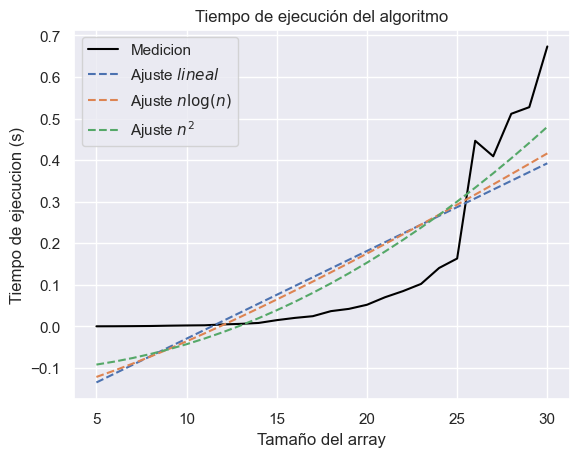

In [13]:
# Plot the results with the adjusted curves

fig, ax = plt.subplots()
ax.plot(x, [results[n] for n in x], label="Medicion", color="black")
ax.plot(x, [f_lineal(n, c_lineal[0], c_lineal[1]) for n in x], "--", label="Ajuste $lineal$")
ax.plot(
    x, [f_nlogn(n, c_nlogn[0], c_nlogn[1]) for n in x], "--", label="Ajuste $n \log(n)$"
)
ax.plot(x, [f_n2(n, c_n2[0], c_n2[1]) for n in x], "--", label="Ajuste $n^2$")
ax.set_title("Tiempo de ejecución del algoritmo")
ax.set_xlabel("Tamaño del array")
ax.set_ylabel("Tiempo de ejecucion (s)")
ax.legend()
plt.show()

In [14]:
# Cuadratic errors

errors_lineal = [np.abs(f_lineal(n, c_lineal[0], c_lineal[1]) - results[n]) for n in x]
errors_nlogn = [np.abs(f_nlogn(n, c_nlogn[0], c_nlogn[1]) - results[n]) for n in x]
errors_n2 = [np.abs(f_n2(n, c_n2[0], c_n2[1]) - results[n]) for n in x]

print(f"Error cuadrático total ajuste lineal: {np.sum(np.power(errors_lineal, 2))}")
print(f"Error cuadrático total ajuste n log(n): {np.sum(np.power(errors_nlogn, 2))}")
print(f"Error cuadrático total ajuste n^2: {np.sum(np.power(errors_n2, 2))}")

Error cuadrático total ajuste lineal: 0.355170555017805
Error cuadrático total ajuste n log(n): 0.3122252908730369
Error cuadrático total ajuste n^2: 0.21177563511390407
